In [90]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/파이토치")

from torch import nn, optim
from torchvision import datasets, transforms
from multiclass_functions1 import *

import torch
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.11/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.11/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/파이토치',
 '/tmp/tmpdmrxgroa',
 '/content/drive/MyDrive/Colab Notebooks/파이토치',
 '/content/drive/MyDrive/Colab Notebooks/파이토치',
 '/content/drive/MyDrive/Colab Notebooks/파이토치',
 '/content/drive/MyDrive/Colab Notebooks/파이토치',
 '/content/drive/MyDrive/Colab Notebooks/파이토치',
 '/content/drive/MyDrive/Colab Notebooks/파이토치']

In [92]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [93]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH=5
criterion = nn.CrossEntropyLoss()
new_model_train = False
model_type = "MLP"
dataset = "MNIST"
save_model_path = f"/content/drive/MyDrive/파이토치/results/{model_type}_{dataset}.pt"

In [94]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = "/content/drive/MyDrive/파이토치/data", train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = "/content/drive/MyDrive/파이토치/data", train=False, download=True, transform=transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [95]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(
            nn.Linear(28*28, 30),
            nn.BatchNorm1d(30),
            nn.ReLU(),
            nn.Linear(30, len(train_DS.classes))
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x

In [96]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'from google.colab import drive\ndrive.mount(\'/content/drive\')\n\nimport sys\nsys.path.append("/content/drive/MyDrive/Colab Notebooks/파이토치")\n\nfrom torch import nn, optim\nfrom torchvision import datasets, transforms\nfrom multiclass_functions1 import *\n\nimport torch\nimport numpy as np\nimport matplotlib.pyplot as plt',
  'sys.path',
  'DEVICE = "cuda" if torch.cuda.is_available() else "cpu"\nprint(DEVICE)',
  'BATCH_SIZE = 32\nLR = 1e-3\nEPOCH=5\ncriterion = nn.CrossEntropyLoss()\nnew_model_train = False\nmodel_type = "MLP"\ndataset = "MNIST"\nsave_model_path = f"/content/drive/MyDrive/파이토치/results/{model_type}_{dataset}.pt"',
  'transform = transforms.ToTensor()\ntrain_DS = datasets.MNIST(root = 

In [97]:
model = globals()[model_type]().to(DEVICE) # globals() => golbal 변수들이 딕셔너리 형태로, globals()[model_type]는 'MLP' 라는 string으로 인덱싱 한것
print(model)
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=30, out_features=10, bias=True)
  )
)
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [98]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model.state_dict(), save_model_path)

    plt.plot(range(1, EPOCH+1), loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid()


In [99]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))

<All keys matched successfully>

In [100]:
Test(load_model, test_DL)
print(count_params(load_model))

Test accuracy: 9653/10000 (96.5 %)
23920


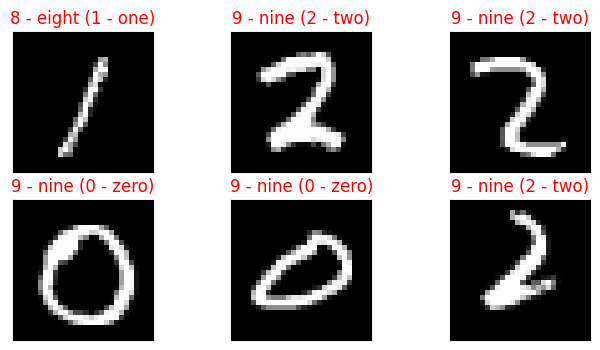

In [101]:
Test_plot(model, test_DL)

10
96.53


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0 - zero'),
  Text(1, 0, '1 - one'),
  Text(2, 0, '2 - two'),
  Text(3, 0, '3 - three'),
  Text(4, 0, '4 - four'),
  Text(5, 0, '5 - five'),
  Text(6, 0, '6 - six'),
  Text(7, 0, '7 - seven'),
  Text(8, 0, '8 - eight'),
  Text(9, 0, '9 - nine')])

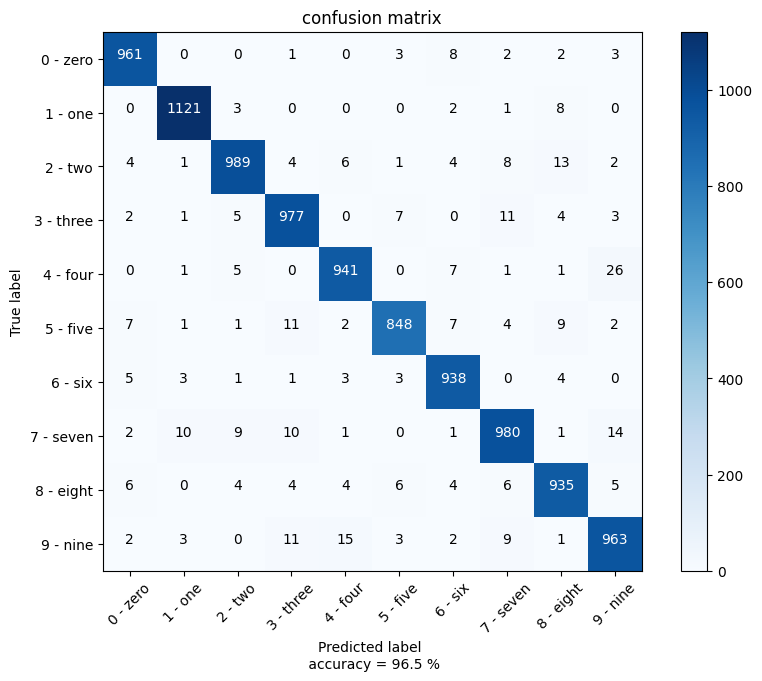

In [102]:
confusion = get_conf(load_model, test_DL)
plot_confusion_matrix(confusion, test_DL.dataset.classes)
plt.xticks(rotation=45)

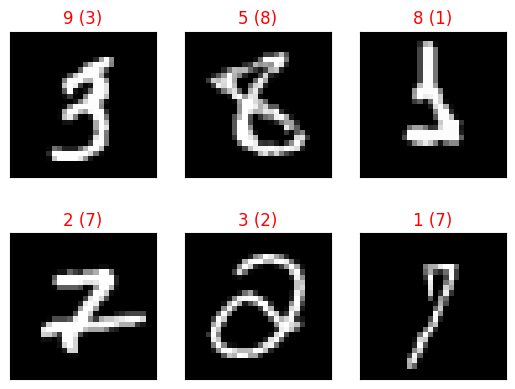

In [193]:
cnt = 0
load_model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_DL:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        y_hat = load_model(x_batch)
        pred = y_hat.argmax(dim=1)

        """
        예측값(pred)과 실제값(y_batch)을 비교하여,
        서로 다른(=예측이 틀린) 위치에 True를 갖는 불리언 텐서 생성
        예: pred = tensor([1, 0, 2]), y_batch = tensor([1, 1, 2]) → false_idx = tensor([False, True, False])
        """
        false_idx = pred != y_batch

        """
        예측이 틀린 샘플들만 x_batch에서 선택
        false_idx가 True인 샘플만 첫 번째 차원(batch 차원)에서 선택하고,
        나머지 차원(예: 이미지의 채널, 높이, 너비)은 그대로 유지

        예시:
        x_batch.shape = (32, 1, 28, 28)일 경우
        false_idx.shape = (32,) → 예측이 틀린 샘플 위치만 True
        X_false.shape = (N_wrong, 1, 28, 28) → 예측이 틀린 N_wrong개 샘플만 추출
        """
        X_false = x_batch[false_idx, ...].to('cpu')
        pred_false = pred[false_idx, ...].to('cpu')
        Y_false = y_batch[false_idx, ...].to('cpu') # 틀린 샘플들에 대한 '정답' 라벨을 의미

        if X_false.shape[0] != 0:
            if cnt == 6:
                break
            for i in range(X_false.shape[0]):
                if cnt == 6:
                    break
                cnt += 1
                pred_class = pred_false[i].item()
                true_class = Y_false[i].item()
                plt.subplot(2, 3, cnt,xticks=[], yticks=[])
                """
                X_false[i, ...]	(1, 28, 28)	i번째 샘플 전체 (채널 포함)
                X_false[i, 0, ...]	(28, 28)	i번째 샘플의 첫 번째 채널(흑백 이미지 한 장)만 선택
                """
                plt.imshow(X_false[i,0,...], cmap='gray')
                plt.title(f"{pred_class} ({true_class})", color=("r"))
